In order to successfully complete this assignment you need to submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

__<font color=red>Members of the same group can submit the same notebook. You don't need to create your own.</font>__

### <p style="text-align: right;"> &#9989; Pavan Yachamaneni</p>

---
# __Agent Based Modeling: Ant Foraging Model __

<img src="https://miro.medium.com/max/1440/1*yrVzKSeqaA1O3G3HF-AHlw.gif" alt="animated image of birds flocking in real life and in an agent based model">

Image from: [Danil Nagy
 blog on Behavioral Systems](https://medium.com/generative-design/behavioral-systems-d010d0d11932_)



# Learning objectives

At the end of the exercise, you should be able to:
- Explain what agent based modeling is.
- Practice coding agent based model.

# Outline


1. [Review of pre-class assignment](#Review_of_pre-class_assignment)
2. [Agent Based Modeling (ABM)](#Agent_Based_Modeling)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Stuck at understanding full model of ACO.

# 2. Agent Based Modeling for Ant Foraging


In this project, a colony of ants forages(looking) for food. Though each ant follows a set of simple rules, the colony as a whole acts in a sophisticated way.

**HOW IT WORKS**
At the beginning, the each ant generally exploits the food source randomly. When an ant finds a piece of food, it carries the food back to the nest, dropping a chemical as it moves. When other ants "sniff" the chemical, they follow the chemical toward the food. As more ants carry food to the nest, they reinforce the chemical trail. It is more difficult for the ants to form a stable trail to the more distant food, since the chemical trail has more time to evaporate and diffuse before being reinforced.

The EVAPORATION-RATE is a parameter that controls the evaporation rate of the chemical.




---
<a name="Ant_forging_code_review"></a>
## 2.2 Ant forging code review

Reading other people's code is a skill that every programmer should try and master.  It is often difficult and annoying because it can be tricky to get into other programmer's head.    

&#9989; **<font color=red>QUESTION:</font>**  Study the procedural code for an ant-forging simulation given below. Understand what each part of the code is doing. Write markdown comments after "<i># ==></i>" in the code. The comments should be concise but with enough information for readers.  

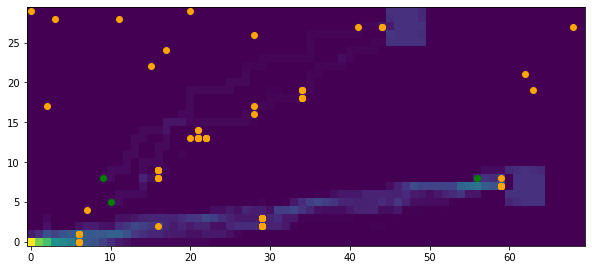

<Figure size 720x360 with 0 Axes>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import random 
import numpy as np

from IPython.display import display, clear_output
import time


# ==> Defined number of ants and environment dimensions
num_ants = 100
x_dim = 70
y_dim = 30
EVAPORATION_RATE = 1

# ==> 
smell = np.zeros((x_dim,y_dim))
food = np.zeros((x_dim,y_dim))

# ==> Defined the Location and Quantity of food
food[45:50, 25:30] = 10
food[60:65, 5:10] = 10

# ==> Defined the position of ant that is its starting position
ant_loc = np.zeros((num_ants,2))
for a in range(num_ants):
    ant_loc[a,0] = np.random.randint(0,x_dim)
    ant_loc[a,1] = np.random.randint(0,y_dim)
     
# ==> Defiend Actions that a ant can peform and Its ojective(Has Food) Parameter
has_food = np.zeros(num_ants)

directions = ['up', 'left', 'down', 'right']


fig, ax = plt.subplots(figsize=(10,5))

# Main simulation loop
for i in range(500):
    
    # ==> Update the position for each ant depending upon food
    for a in range(0,num_ants):
        
        # ==> Initial Location of ant a in loop
        x = int(ant_loc[a,0])
        y = int(ant_loc[a,1]) 
    
        # If ant is at home, put food down. The ant has no food carried on it. 
        if (x == 0 and y == 0):
            has_food[a] = 0  
            
        # ==> Check if initial location has food
        if (has_food[a] == 1):
            
            # ==> [Comment on the code till the end of the if/else statement below] 
            #  
            # If food was found, It should come to nest so decrese the positions of (X,Y)
            #
            pick = np.zeros(x + y)
            pick[0:x] = 1          
            if ( np.random.choice(pick) == 1 ):
                x = x - 1
            else:
                y = y - 1

            # ==> [Comment on the next two if statements]
            # Only Origin (0,0) is the last points
            if(x < 0):
                x = 0
            if(y < 0):
                y = 0
                
            # ==> Released the pheremone as food was found
            smell[x, y] = smell[x, y] + 100    
            
        else:
            # Check to see if there is pheromone around.
            g = [] 
            m  = [] 
            
            # ==> Want to find the next move
            # ==> so top of  X boundaries check smell towards right
            if ( x + 1 < x_dim ):
                if ( smell[x+1, y] > 0 ):
                    m.append(smell[x+1, y])
                    g.append('right')
            # ==>  At bottom x boundary, check smell  amd move towards left
            if ( x - 1 >=0 ):
                if ( smell[x-1, y] > 0 ):
                    m.append(smell[x+1, y])
                    g.append('left')
                    
            # ==>  Same as X but Up and Down comes in Y
            if ( y + 1 < y_dim ):
                if ( smell[x, y+1] > 0 ):
                    m.append(smell[x, y+1])
                    g.append('up')
            # ==>       
            if ( y - 1 >= 0 ):
                if ( smell[x, y-1] > 0 ):
                    m.append(smell[x, y-1])
                    g.append('down')
                    
                             
            # ==> Check which direction has maximum Pheremone
            if ( g != [] ):
                grad = g[m.index(max(m))]
            else:
                grad = random.choice(directions)
                
            # Move the ant in one of the four directions.
            if ( grad == 'up' ):
                y = y + 1
            elif ( grad == 'right' ):
                x = x + 1
            elif ( grad == 'down' ):
                y = y - 1
            elif ( grad == 'left' ):
                x = x - 1
            else:
                print(grad)
                print("ERROR!!!!!!!!!!!!")

            # ==> BOUNDARY CONDITION  
            if ( x < 0 ):
                x = 0
            if ( y < 0 ):
                y = 0
            if ( x > x_dim - 1 ):
                x = x_dim - 1
            if ( y > y_dim - 1 ):
                y = y_dim - 1
    
            # If an ant is on the grid with food, the ant picks food and food level is 
            # subtracted by 1.
            if food[x, y] > 0:
                has_food[a] = 1
                food[x,y] = food[x,y] - 1
                                
        
        # update ant location
        ant_loc[a,0] = x
        ant_loc[a,1] = y
    
    # ==> Smell minimul value is 0
    smell = smell -  EVAPORATION_RATE
    smell[smell < 0] = 0
    

    # plot the universe
    plt.imshow(50*food.T+smell.T, origin='lower', aspect='equal')
    
    for a in range(0,num_ants):
        color = 'orange'
        if (has_food[a] == 1):
            color = 'g'
        plt.scatter(ant_loc[a,0], ant_loc[a,1], color=color)

    # Animaiton part (dosn't change)
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up    

## 2.3 Modifying the code 

&#9989; **<font color=red>QUESTION:</font>** Modify the above code to realize the following 
- The ants only respond to chemical levels between 20 and 100. # (15,30) be the point
- Move the nest to the middle of the figure
- Let the ant "follows the gradient" of the chemical. That is, it "sniffs" in four directions, then turns in the direction where the chemical is strongest.


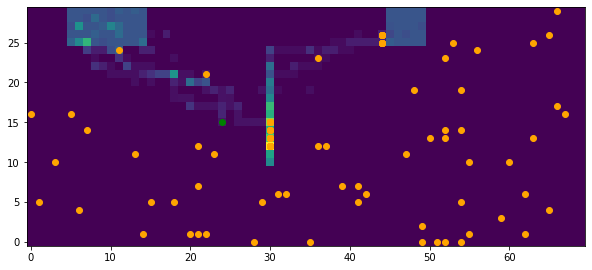

<Figure size 720x360 with 0 Axes>

In [12]:
#Put your modified code here
%matplotlib inline

import matplotlib.pyplot as plt
import random 
import numpy as np

from IPython.display import display, clear_output
import time


# ==> Defined number of ants and environment dimensions
num_ants = 100
x_dim = 70
y_dim = 30
EVAPORATION_RATE = 1

# ==> 
smell = np.zeros((x_dim,y_dim))
food = np.zeros((x_dim,y_dim))

# ==> Defined the Location and Quantity of food
food[45:50, 25:30] = 10
food[5:15, 25:30] = 10

# ==> Defined the position of ant that is its starting position
ant_loc = np.zeros((num_ants,2))
for a in range(num_ants):
    ant_loc[a,0] = np.random.randint(0,x_dim)
    ant_loc[a,1] = np.random.randint(0,y_dim)
     
# ==> Defiend Actions that a ant can peform and Its ojective(Has Food) Parameter
has_food = np.zeros(num_ants)

directions = ['up', 'left', 'down', 'right']


fig, ax = plt.subplots(figsize=(10,5))

# Main simulation loop
for i in range(250):
    
    # ==> Update the position for each ant depending upon food
    for a in range(0,num_ants):
        
        # ==> Initial Location of ant a in loop
        x = int(ant_loc[a,0])
        y = int(ant_loc[a,1]) 
    
        # If ant is at home, put food down. The ant has no food carried on it. 
        if (x == 30 and y == 10):
            has_food[a] = 0  
            
        # ==> Check if initial location has food
        if (has_food[a] == 1):
            
            # ==> [Comment on the code till the end of the if/else statement below] 
            #  
            # If food was found, It should come to nest so decrese the positions of (X,Y)
            #
            pick = np.zeros(x + y)
            pick[0:x] = 1          
            if ( np.random.choice(pick) == 1 and x > 30 ):
                x = x-1
            elif (np.random.choice(pick) == 1 and x < 30):
                x = x+1
            else:
                if ( np.random.choice(pick) == 1 and y > 10 ):
                    y = y-1
                elif (np.random.choice(pick) == 1 and y < 10):
                    y = y+1     

            # ==> [Comment on the next two if statements]
            # Only Origin (0,0) is the last points
            if(x < 0):
                x = 0
            if(y < 0):
                y = 0
                
            # ==> Released the pheremone as food was found
            smell[x, y] = smell[x, y] + 100    
            
        else:
            # Check to see if there is pheromone around.
            g = [] 
            m  = [] 
            
            # ==> Want to find the next move
            # ==> so top of  X boundaries check smell towards right
            if ( x + 1 < x_dim ):
                if ( smell[x+1, y] > 0 ):
                    m.append(smell[x+1, y])
                    g.append('right')
            # ==>  At bottom x boundary, check smell  amd move towards left
            if ( x - 1 >= 0 ):
                if ( smell[x-1, y] > 0 ):
                    m.append(smell[x+1, y])
                    g.append('left')
                    
            # ==>  Same as X but Up and Down comes in Y
            if ( y + 1 < y_dim ):
                if ( smell[x, y+1] > 0 ):
                    m.append(smell[x, y+1])
                    g.append('up')
            # ==>       
            if ( y - 1 >= 0 ):
                if ( smell[x, y-1] > 0 ):
                    m.append(smell[x, y-1])
                    g.append('down')
                    
                             
            # ==> Check which direction has maximum Pheremone
            if ( g != [] ):
                grad = g[m.index(max(m))]
            else:
                grad = random.choice(directions)
                
            # Move the ant in one of the four directions.
            if ( grad == 'up' ):
                y = y + 1
            elif ( grad == 'right' ):
                x = x + 1
            elif ( grad == 'down' ):
                y = y - 1
            elif ( grad == 'left' ):
                x = x - 1
            else:
                print(grad)
                print("ERROR!!!!!!!!!!!!")

            # ==> BOUNDARY CONDITION  
            if ( x < 0 ):
                x = 0
            if ( y < 0 ):
                y = 0
            if ( x > x_dim - 1 ):
                x = x_dim - 1
            if ( y > y_dim - 1 ):
                y = y_dim - 1
    
            # If an ant is on the grid with food, the ant picks food and food level is 
            # subtracted by 1.
            if food[x, y] > 0:
                has_food[a] = 1
                food[x,y] = food[x,y] - 1
                                
        
        # update ant location
        ant_loc[a,0] = x
        ant_loc[a,1] = y
    
    # ==> Smell minimul value is 0
    smell = smell -  EVAPORATION_RATE
    smell[smell < 20] = 0
    

    # plot the universe
    plt.imshow(50*food.T+smell.T, origin='lower', aspect='equal')
    
    for a in range(0,num_ants):
        color = 'orange'
        if (has_food[a] == 1):
            color = 'g'
        plt.scatter(ant_loc[a,0], ant_loc[a,1], color=color)

    # Animaiton part (dosn't change)
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    time.sleep(0.0001)      # Sleep for a fraction of a second to allow animation to catch up    

## 2.4 Using OOP 

Thinking about implementing an __objected oriented__ agent-based model for ant foraging.

&#9989; **<font color=blue>DO THIS:</font>** Discuss with group mates to form a plan to finish the following three steps. 

- Step 1: Think about what class object you want to define to represent the ants and what attributes the class object should have.
- Step 2 :Outline the program structure - sketch out a big picture of what you are trying to accomplish and what the inputs/outputs are.
- Step 3: Predict the final interface - decide how users will interact with your model.

put your plan here

1. Class has attributes of Number of ants, their initial locations, Initial smell and food locations with quantities, Number of Loops to run simulations.
2. And class has 3 functions
    - If found food, update location
    - Finding the nearest pheromone to obtain food, Strategy to update smell
    - Function that has for loop that initialte the above 2 functions
3. User has to select Number of Loops, Number of nodes and the result is simulation of each loop state.

-----
### Congratulations, we're done!

Remember to submit your notebook before the due date.